In [119]:

#makes jupyter notebook screen wider
#from IPython.core.display import HTML, display
#display(HTML("<style>.container { width:80% !important; }</style>"))

from osgeo import gdal
import numpy as np
import pandas as pd
import bokeh.plotting as bp
import holoviews as hv
import geoviews as gv
import datashader as ds
import rasterio as rio
import xarray as xr
import cartopy as crs
import rasterio as rio
from holoviews.operation import contours
from holoviews.operation.datashader import datashade, aggregate
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno


#my code
from interactive_profiler import define_boundaries


#importing the data
name = "Mandakini_fullProfileMC_forced_0.45_3_1258909000_10_80_281_for_Arc.csv" #Set file name
path = "/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Test_data/" #Set path to data
df = pd.read_csv(path+name)

Test_data = "/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Test_data/"
Test = gdal.Open(Test_data + "/Mandakini_basin_281.tif")#Get raster data
M_DEM = Test.ReadAsArray()




#xr_Test = xr.open_dataset('/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Test_data/Mandakini.bil')

In [123]:
from interactive_profiler import define_boundaries
x_range, y_range = define_boundaries(df, 100)

xmin = min(x_range)
ymin = min(y_range)
xmax = max(x_range)
ymax = max(y_range)
test = (xmin, ymin, xmax, ymax)



In [114]:
stream_dataset.data['x'][0:10]

0    328128.8534
1    328040.0409
2    327951.2284
3    327862.4159
4    327773.6034
5    327684.7909
6    327595.9784
7    327507.1659
8    327418.3534
9    327329.5409
Name: x, dtype: float64

In [125]:
from cartopy import crs

hv.notebook_extension()

%opts Raster [xrotation=20] Points (color='r')[xrotation=20]

#Import raster data in various ways.
#raster_data = rio.open(Test_data + "/Mandakini.bil")

#Convert the .bil raster to and xarray dataarray
foo = xr.DataArray(M_DEM, dims=['x', 'y'])#, dims=['elevation'])

xr_dataset = gv.Dataset(M_DEM, #crs=crs.PlateCarree(), 
                        kdims=['latitude','longitude'],
                        vdims=['elevation'])

#trying to wrap the raster into a gvDataset, but this isnt working
kdims = ['easting', 'northing']
vdims = ['elevation']
xr_raster = gv.Dataset(M_DEM, kdims=kdims, vdims=vdims, crs=crs.PlateCarree())
#xr_dataset.to(gv.Image, kdims=kdims, vdims=vdims)
#xr_raster_image = gv.Image(xr_raster)


#STream
stream_dataset = gv.Dataset(df, kdims=['x', 'y'], vdims=['elevation', 'chi', 'flow_distance'])
stream = hv.Points(stream_dataset)

 
raster = hv.Raster(M_DEM)(style={'cmap':'inferno'}) 

image = gv.Image(xr_raster, crs=crs.PlateCarree()) (style={'cmap':'inferno'})




#stream = hv.Points((stream_dataset.data['x'], stream_dataset.data['y']))
#point = 
#stream.extents =(xmin, ymax, xmax, ymin)

#raster.extents = (xmin, ymax, xmax, ymin)



raster + stream + image


/Users/bmelosh/anaconda2/envs/geospatial/lib/python2.7/site-packages/holoviews/core/util.py:1380: RuntimeWarning: divide by zero encountered in double_scalars
  density = round(1./((high-low)/(len(vals)-1)), sys.float_info.dig)


TypeError: shape() got an unexpected keyword argument 'gridded'

:Layout
   .Image.I  :Image   [Longitude,Latitude]   (z)
   .Points.I :Points   [x,y]   (elevation,chi,flow_distance)
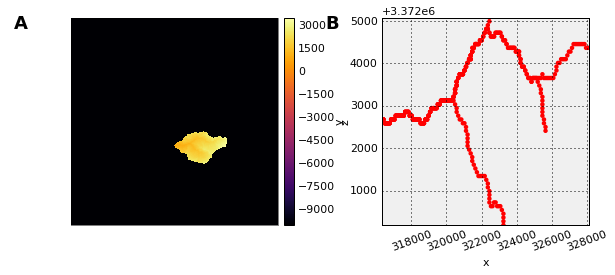

In [126]:
from osgeo import gdal
import holoviews as hv
import geoviews as gv
import pandas as pd
from cartopy import crs

hv.notebook_extension()

%opts Raster [xrotation=20] Points (color='r')[xrotation=20]

df = pd.read_csv(path+name)
stream_dataset = gv.Dataset(df, kdims=['x', 'y'], vdims=['elevation', 'chi', 'flow_distance'])
stream = hv.Points(stream_dataset)



Test = gdal.Open(Test_data + 'Mandakini.bil')#Get raster data
DEM = Test.ReadAsArray()
raster = hv.Raster(DEM)(style={'cmap':'inferno'}) 

image = gv.Image(M_DEM, crs=crs.PlateCarree()) (style={'cmap':'inferno'})

#image2 = gv.Image(
#raster + stream + 
image + stream

:DynamicMap   []
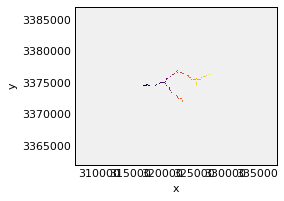

In [8]:
#Plot stream data as geoviews dataset
%opts Raster [xrotation=20] Points (color='r')[xrotation=20]
#hv.notebook_extension('bokeh', width=995)
hv.notebook_extension()

stream_dataset = gv.Dataset(df, kdims=['x', 'y'], vdims=['elevation', 'chi', 'flow_distance'])
#dem_data = gv.Dataset(M_DEM, kdims=['x', 'y'])
shade_defaults = dict(x_range=x_range, y_range=y_range, x_sampling=100, y_sampling=100, width=1200, height=660)

shaded = datashade(hv.Points(stream_dataset),  cmap=inferno, aggregator=ds.mean('elevation'), **shade_defaults)
shaded

(0, 0, 587, 648)


:Layout
   .Raster.I :Raster   [x,y]   (z)
   .Points.I :Points   [x,y]   (elevation,chi,flow_distance)
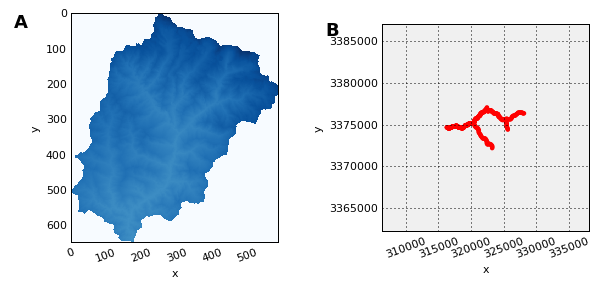

In [93]:
from cartopy import crs

%opts Raster [xrotation=20] Points (color='r')[xrotation=20]

#points = df['x'],df['y']

stream = hv.Points(stream_dataset)

#raster imported with Rasterio
dem = hv.Raster(raster_data)(style={'cmap':'inferno'}) #, kdims=['x', 'y'], vdims=['elevation'])


#stream#.datatype
#stream.select[x=]
#stream.data[0:10]

#df.head()
#Convert from Pandas to Xarray dataset
#points_test = xr.Dataset.from_dataframe(df)

#Convert the .bil raster to and xarray dataarray
#foo = xr.DataArray(M_DEM)

#kdims = ['x', 'y']
#vdims = ['elevation']#, 'flow_distance', 'chi']


#xr_dataset = gv.Dataset(points_test, kdims=kdims, vdims=vdims, crs=crs.PlateCarree())
#xr_raster = gv.Dataset(foo, kdims=kdims, vdims=vdims)




kdims = ['x', 'y']

#raster imported with numpy and gdal
ras = hv.Raster(M_DEM, crs=crs.PlateCarree())(style={'cmap':'Blues'})

#ras.extents = (xmin, ymax, xmax, ymin) #something is backwards in my "Define boundaries" function
print(ras.extents)

stream.extents =(xmin, ymin, xmax, ymax)


#test1 = hv.Points(stream.data[:])
#test1.extents = (x0,y1,x1,y0)
ras + stream
# test1_map = gv.Raster['x', 'latitude']) * gv.Points([test1])
# temp_map + temp_curve

#pnt = hv.Points()
#mand = hv.HoloMap(ras, kdims=kdims)
#ras * stream + stream
#((ras * hv.HLine(y=330)).hist() + ras.sample(y=330))

/Users/bmelosh/anaconda2/envs/geospatial/lib/python2.7/site-packages/matplotlib/axes/_base.py:3040: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=3387129.22599, top=3387129.22599
  'bottom=%s, top=%s') % (bottom, top))


:DynamicMap   []
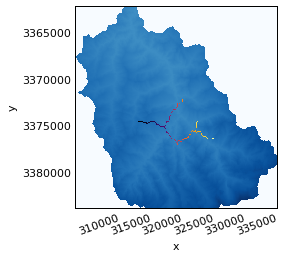

In [8]:
import holoviews as hv
import geoviews as gv
from bokeh.models import ColumnDataSource
hv.notebook_extension()

dataset = gv.Dataset(df, kdims=['x', 'y'], vdims=['elevation', 'chi', 'flow_distance'])
shade_defaults = dict(x_range=x_range, y_range=y_range, x_sampling=100, y_sampling=100, width=1200, height=660)

shaded = datashade(hv.Points(dataset),  cmap=inferno, aggregator=ds.mean('elevation'), **shade_defaults)

ras*shaded

In [9]:
#using holoviews to plot up raster and points

#%output backend='bokeh'

#%opts Overlay [width=600 height=300 xaxis=None yaxis=None] 
#%opts Points (size=0.005 cmap='inferno') [tools=['hover'] color_index=2]


stream = gv.Dataset(df, kdims=['x', 'y', 'elevation', 'chi'])

streams = stream.to(gv.Points, kdims=['x', 'y'],
                    vdims=['elevation', 'chi'], crs=crs.PlateCarree())






xr_dataset = gv.Dataset(M_DEM, crs=crs.PlateCarree(),
                        kdims=['latitude','longitude'],
                        vdims=['elevation'])
xr_dataset

#ras2 = xr_dataset.to(gv.Image, ['longitude', 'latitude']) * gf.coastline
#ras2[::2]







kdims = ['x', 'y']

ras = hv.Raster(M_DEM)(style={'cmap':'Blues'})

ras.extents = (x0, y1, x1, y0) #something is backwards in my "Define boundaries" function
stream.extents =(x0,y1,x1,y0)


ras2 = hv.Raster(raster_data)


AttributeError: 'module' object has no attribute 'PlateCarree'

In [18]:
#running through some tutorials
import iris
import numpy as np
import xarray as xr
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
from cartopy import crs

hv.notebook_extension()




In [104]:
%opts Image {+framewise} [colorbar=True] Curve [xrotation=60]
%output max_frames=1000


#iris.FUTURE.netcdf_promote=True

iris_ensemble = iris.load_cube('/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Test_data/Mandakini.bil')
#print iris_ensemble.summary()


#Import raster data in various ways.
# raster_data = rio.open(Test_data + "Mandakini.bil")
# raster_data

ValueError: No format specification could be found for the given buffer. File element cache:
 {'FileExtension()': '.bil', 'LeadingLine()': '\x00<\x1c\xc6\x00<\x1c\xc6\x00<\x1c\xc6\x00<\x1c\xc6\x00<\x1c\xc6\x00<\x1c\xc6\x00<\x1c\xc6\x00<\x1c\xc6\x00<\x1c\xc6\x00<\x1c\xc6\x00<\x1c\xc6\x00<\x1c\xc6\x00<...', 'MagicNumber(8, None)': '16920135335681222', 'UriProtocol()': 'file', 'MagicNumber(4, None)': '3939526', 'MagicNumber(100, None)': '\x00<\x1c\xc6\x00<\x1c\xc6\x00<\x1c\xc6\x00<\x1c\xc6\x00<\x1c\xc6\x00<\x1c\xc6\x00<\x1c\xc6\x00<\x1c\xc6\x00<\x1c\xc6\x00<\x1c\xc6\x00<\x1c\xc6\x00<\x1c\xc6\x00<...'}

In [33]:
xr_ensemble = xr.open_dataset('./geoviews-examples/sample-data/ensemble.nc')
xr_ensemble

<xarray.Dataset>
Dimensions:                  (bnds: 2, latitude: 145, longitude: 192, time: 6)
Coordinates:
  * time                     (time) datetime64[ns] 2011-08-16T12:00:00 ...
  * latitude                 (latitude) float32 -90.0 -88.75 -87.5 -86.25 ...
  * longitude                (longitude) float32 0.0 1.875 3.75 5.625 7.5 ...
    forecast_period          (time) timedelta64[ns] 29 days 12:00:00 ...
    forecast_reference_time  datetime64[ns] 2011-07-18
Dimensions without coordinates: bnds
Data variables:
    surface_temperature      (time, latitude, longitude) float64 214.0 214.0 ...
    latitude_longitude       int32 -2147483647
    time_bnds                (time, bnds) float64 3.645e+05 3.652e+05 ...
    forecast_period_bnds     (time, bnds) float64 336.0 1.08e+03 1.08e+03 ...
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   7.6
    Conventions:  CF-1.5

In [25]:
kdims = ['time', 'longitude', 'latitude']
vdims = ['surface_temperature']

xr_dataset = gv.Dataset(xr_ensemble, kdims=kdims, vdims=vdims, crs=crs.PlateCarree())
hv.Dimension.type_formatters[np.datetime64] = '%Y-%m-%d'

In [48]:
xr_dataset.data

<xarray.Dataset>
Dimensions:                  (bnds: 2, latitude: 145, longitude: 192, time: 6)
Coordinates:
  * time                     (time) datetime64[ns] 2011-08-16T12:00:00 ...
  * latitude                 (latitude) float32 -90.0 -88.75 -87.5 -86.25 ...
  * longitude                (longitude) float32 0.0 1.875 3.75 5.625 7.5 ...
    forecast_period          (time) timedelta64[ns] 29 days 12:00:00 ...
    forecast_reference_time  datetime64[ns] 2011-07-18
Dimensions without coordinates: bnds
Data variables:
    surface_temperature      (time, latitude, longitude) float64 214.0 214.0 ...
    latitude_longitude       int64 -2147483647
    time_bnds                (time, bnds) float64 3.645e+05 3.652e+05 ...
    forecast_period_bnds     (time, bnds) float64 336.0 1.08e+03 1.08e+03 ...
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   7.6
    Conventions:  CF-1.5

:HoloMap   [time]
   :Image   [longitude,latitude]   (surface_temperature)
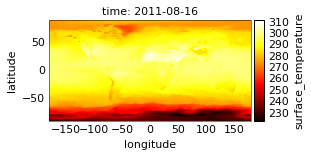
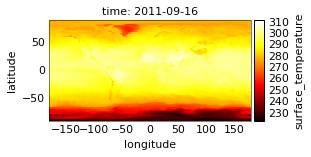
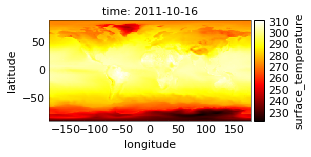
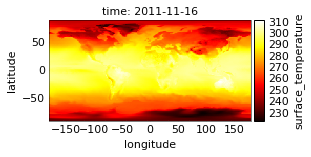
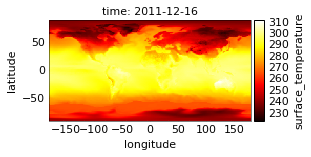
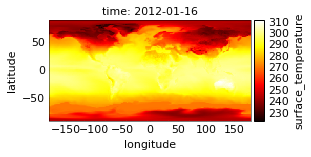

In [42]:
xr_dataset.to(gv.Image, ['longitude', 'latitude'])

In [43]:
air_temperature = gv.Dataset(xr.open_dataset('./geoviews-examples/sample-data/pre-industrial.nc'), kdims=['longitude', 'latitude'],
                             group='Pre-industrial air temperature', vdims=['air_temperature'],
                             crs=crs.PlateCarree())
air_temperature

:Dataset   [longitude,latitude]   (air_temperature)

:Layout
   .HoloMap.I                                     :HoloMap   [time]
      :Image   [longitude,latitude]   (surface_temperature)
   .Pre_hyphen_minus_industrial_air_temperature.I :Image   [longitude,latitude]   (air_temperature)
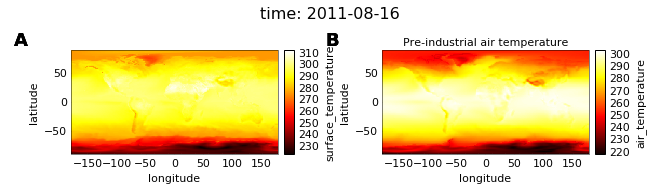
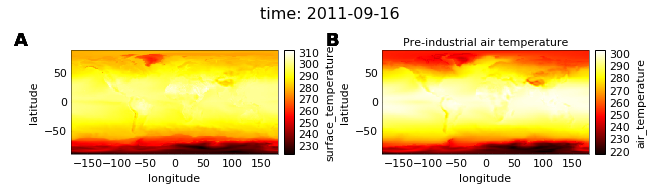
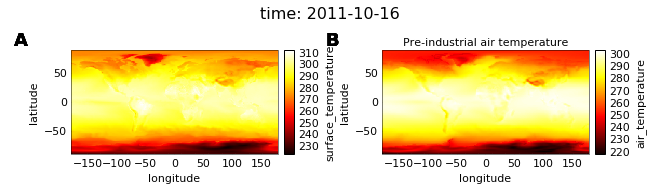
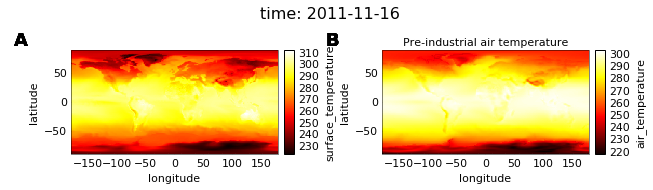
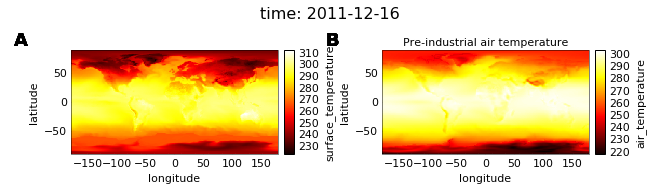
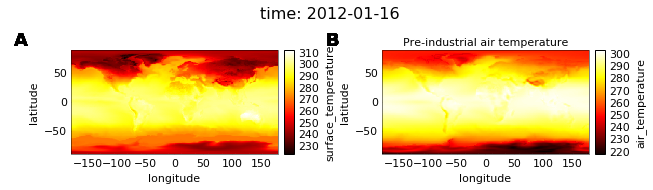

In [44]:
(xr_dataset.to.image(['longitude', 'latitude'])+
 air_temperature.to.image(['longitude', 'latitude']))

:Layout
   .HoloMap.I :HoloMap   [time]
      :Overlay
         .Image.I  :Image   [longitude,latitude]   (surface_temperature)
         .Points.I :Points   [Longitude,Latitude]
   .Curve.I   :Curve   [time]   (surface_temperature)
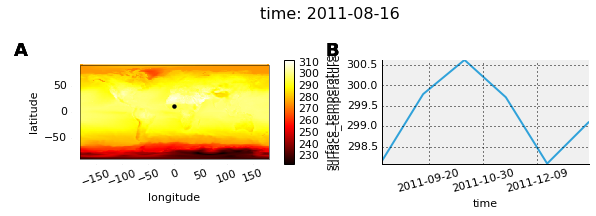
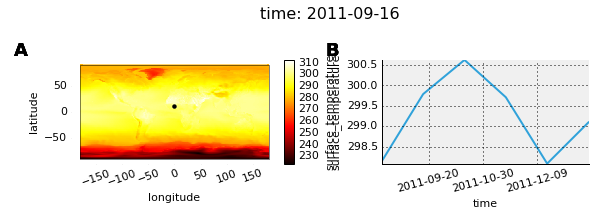
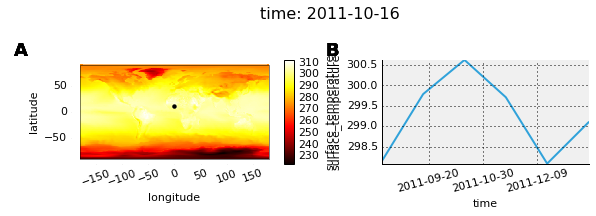
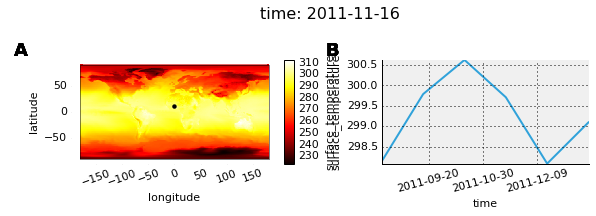
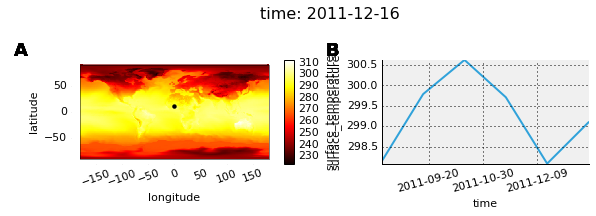
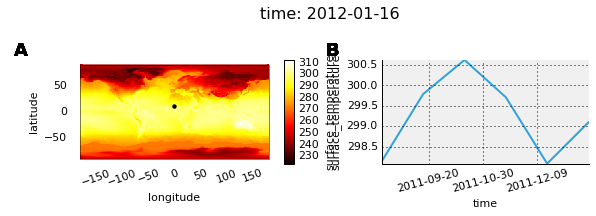

In [54]:

%%opts Curve [aspect=2 xticks=4 xrotation=15] Points (color='k')
temp_curve = hv.Curve(xr_dataset.select(longitude=0, latitude=10), kdims=['time'])
temp_map = xr_dataset.to(gv.Image,['longitude', 'latitude']) * gv.Points([(0,10)], crs=crs.PlateCarree())
temp_map + temp_curve

:HoloMap   [time]
   :Overlay
      .Image.I     :Image   [longitude,latitude]   (surface_temperature)
      .Coastline.I :Feature   [Longitude,Latitude]
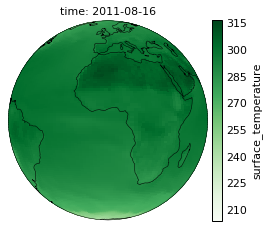
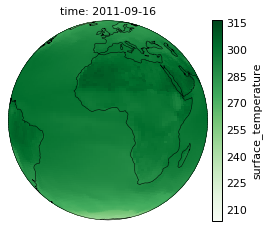
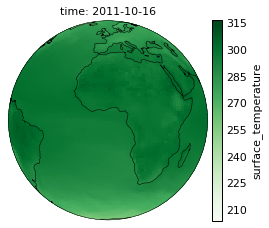
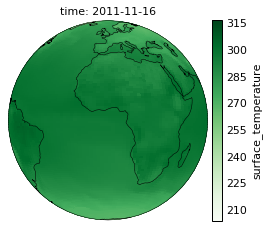
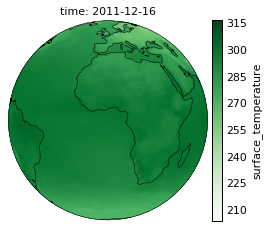
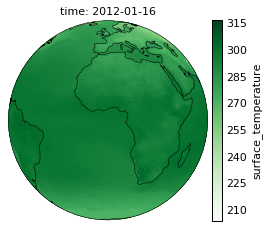

In [55]:

%%opts Image [projection=crs.Geostationary()] (cmap='Greens') Overlay [xaxis=None yaxis=None]
xr_dataset.to.image(['longitude', 'latitude']) * gf.coastline

317.331787109


:HoloMap   [time]
   :Overlay
      .Image.I     :Image   [longitude,latitude]   (surface_temperature)
      .Coastline.I :Feature   [Longitude,Latitude]
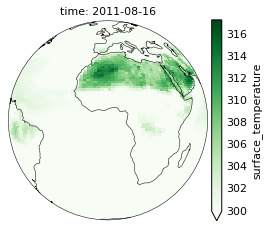
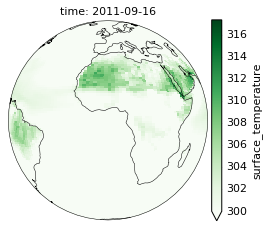
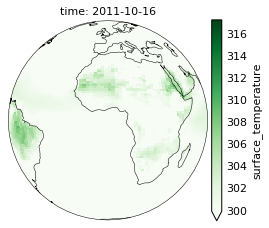
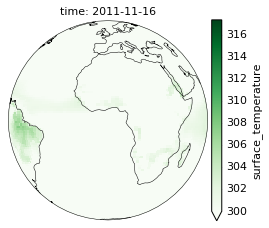
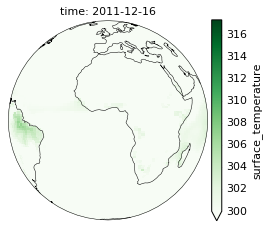
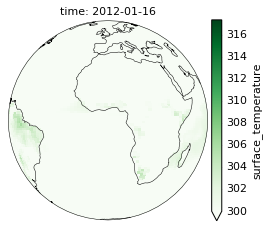

In [56]:

%%opts Image [projection=crs.Geostationary()] (cmap='Greens') Overlay [xaxis=None yaxis=None]
max_surface_temp = xr_dataset.range('surface_temperature')[1]
print max_surface_temp
xr_dataset.redim(surface_temperature=dict(range=(300, max_surface_temp))).to(gv.Image,['longitude', 'latitude']) \
  * gf.coastline

In [60]:
max_elevation = xr_raster.range('elevation')[1]
xr_raster.redim(elevation = dict(range=(0,max_elevation))).to(gv.Image, ['easting', 'northing'])

TypeError: shape() got an unexpected keyword argument 'gridded'

In [73]:
xr_raster.to(gv.Image)

TypeError: shape() got an unexpected keyword argument 'gridded'

In [72]:
xr_raster.data
xr_raster.range('northing')

(-9999.0, 2509.0)

In [66]:
xr_dataset.data


2502.0